# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df['sex'] = df['sex'].astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Criando a tabela com sex para inicío da análise
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

# Renomear os índices (sex: 0 → Female, 1 → Male)
tab = tab.rename(index={0: 'Female', 1: 'Male'})

# Renomear as colunas (flag_doente: 0 → No, 1 → Yes)
tab = tab.rename(columns={0: 'No', 1: 'Yes'})

tab

flag_doente,No,Yes,All
sex,,,
Female,72,25,97
Male,92,114,206
All,164,139,303


In [5]:
# Criando as variávei:
# Quantidade média de doentes
tab['media_doentes'] = tab['Yes']/tab['All']
# Odds
tab['odds'] = tab['Yes']/tab['No']
# Odds ratio
tab['odds_ratio'] = tab['odds']/tab.loc['Male','odds']
# Logito
tab['logit'] = np.log(tab['odds'])
# WOE
tab['woe'] = np.log(tab['odds_ratio'])

display(tab)

flag_doente,No,Yes,All,media_doentes,odds,odds_ratio,logit,woe
sex,,,,,,,,
Female,72,25,97,0.257732,0.347222,0.280214,-1.057790,-1.272200
Male,92,114,206,0.553398,1.239130,1.000000,0.214410,0.000000
All,164,139,303,0.458746,0.847561,0.683997,-0.165392,-0.379802


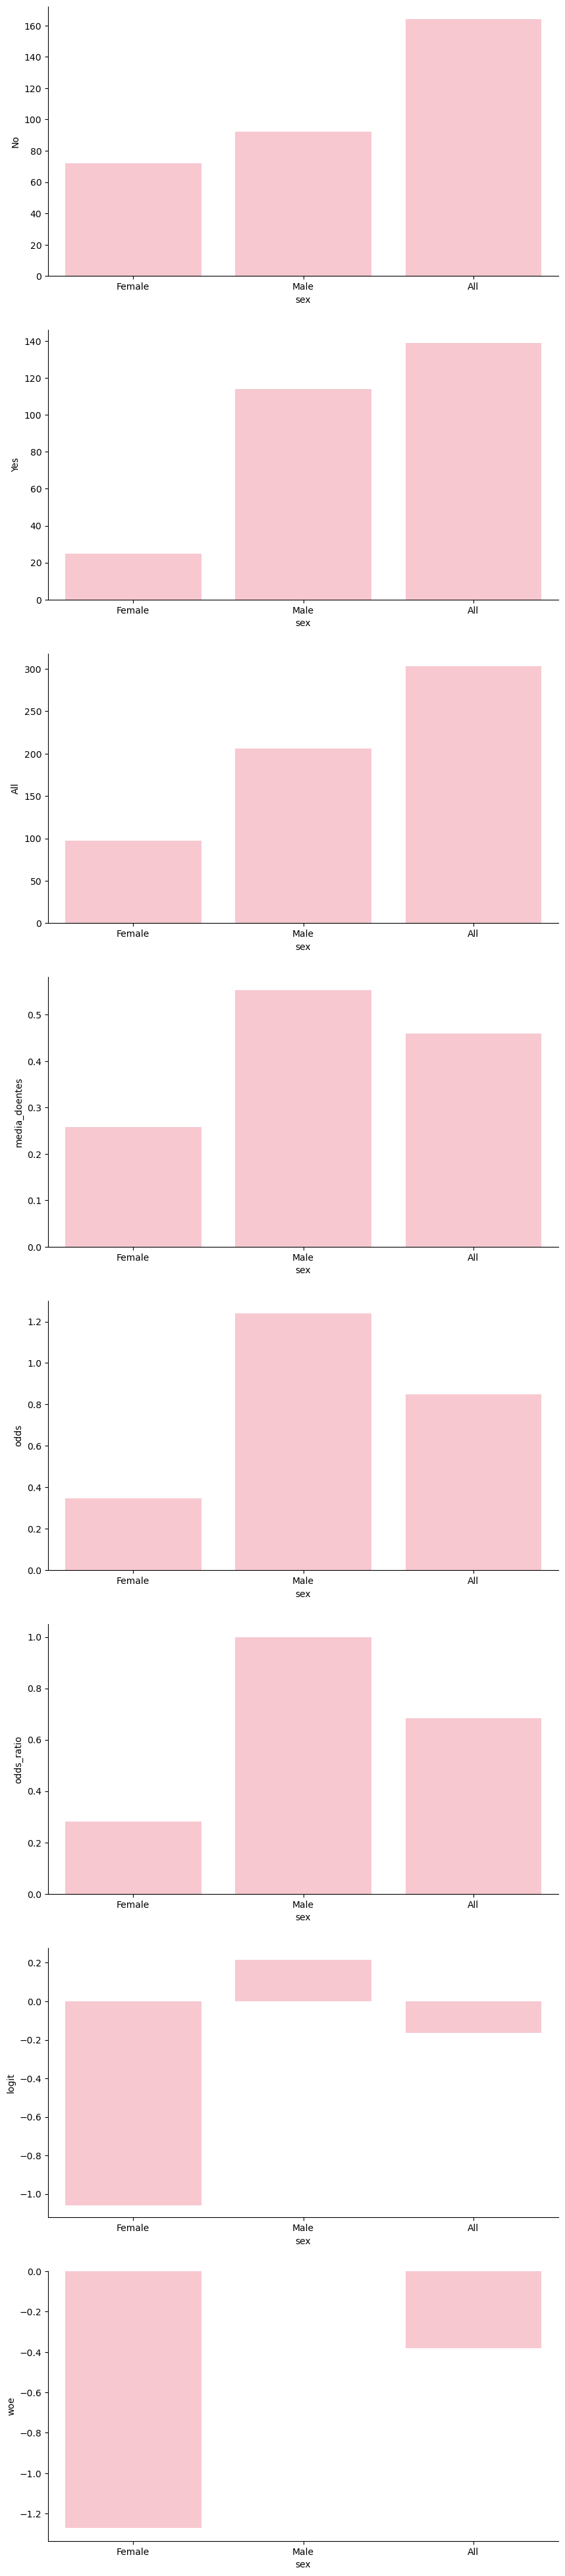

In [6]:
fig, ax = plt.subplots(8,1,figsize=(10,50))
sns.barplot(x='sex',y='No',data=tab, color = 'pink', ax=ax[0])
sns.barplot(x='sex',y='Yes',data=tab, color = 'pink', ax=ax[1])
sns.barplot(x='sex',y='All',data=tab, color = 'pink', ax=ax[2])
sns.barplot(x='sex',y='media_doentes',data=tab, color = 'pink', ax=ax[3])
sns.barplot(x='sex',y='odds',data=tab, color = 'pink', ax=ax[4])
sns.barplot(x='sex',y='odds_ratio',data=tab, color = 'pink', ax=ax[5])
sns.barplot(x='sex',y='logit',data=tab, color = 'pink', ax=ax[6])
sns.barplot(x='sex',y='woe',data=tab, color = 'pink', ax=ax[7])
sns.despine()

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
display(df['age'].sort_values().unique())
print("Temos ", df['age'].nunique(), " idades no dataframe.")
print("Sendo a média de idades", df['age'].mean())

array([29., 34., 35., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 74.,
       76., 77.])

Temos  41  idades no dataframe.
Sendo a média de idades 54.43894389438944


In [8]:
# Categorizando em age em 5 categorias
df['cat_age'] = pd.qcut(df['age'], 5, duplicates='drop')
df['cat_age'].value_counts().sort_index()

cat_age
(28.999, 45.0]    63
(45.0, 53.0]      64
(53.0, 58.0]      71
(58.0, 62.0]      45
(62.0, 77.0]      60
Name: count, dtype: int64

In [9]:
# Criando a tabela com os grupos de age criados acima para inicío da análise
tab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins=True)

# Renomear as colunas (flag_doente: 0 → No, 1 → Yes)
tab_age = tab_age.rename(columns={0: 'No', 1: 'Yes'})

tab_age

flag_doente,No,Yes,All
cat_age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [10]:
# Criando as variávei:
# Quantidade média de doentes
tab_age['media_doentes2'] = tab_age['Yes']/tab_age['All']
# Odds
tab_age['odds2'] = tab_age['Yes'] / tab_age['No']
# Odds ratio
# Calcular a razão de chances (odds ratio) em relação à categoria de referência
# Escolher (53.0, 58.0] como referênciauma vez que a média de idade (54.4389) está dentro desse grupo
odds_ref = tab_age.iloc[2]['odds2']
tab_age['odds_ratio2'] = tab_age['odds2'] / odds_ref
# Logito
tab_age['logit2'] = np.log(tab_age['odds2'])
# WOE
tab_age['woe2'] = np.log(tab_age['odds_ratio2'])

display(tab_age)

flag_doente,No,Yes,All,media_doentes2,odds2,odds_ratio2,logit2,woe2
cat_age,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.279324,-1.077559,-1.275385
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.429792,-0.646627,-0.844453
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.000000,0.197826,0.000000
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.019724,0.900787,0.702961
"(62.0, 77.0]",30,30,60,0.500000,1.000000,0.820513,0.000000,-0.197826
All,164,139,303,0.458746,0.847561,0.695435,-0.165392,-0.363218


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

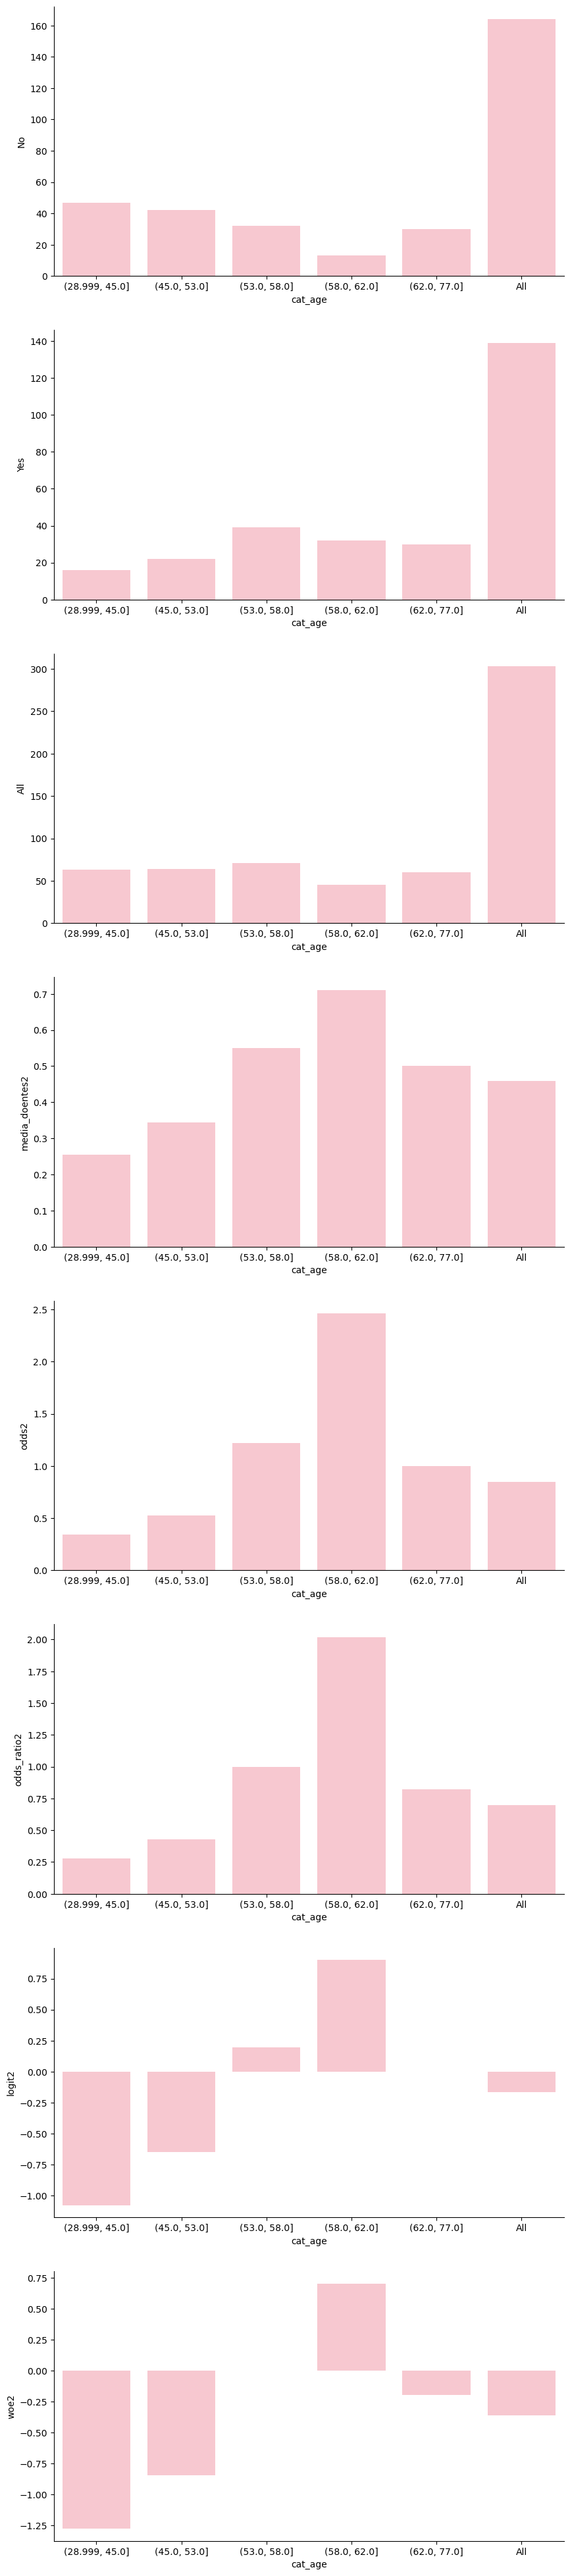

In [11]:
fig, ax = plt.subplots(8,1,figsize=(10,50))
sns.barplot(x='cat_age',y='No',data=tab_age, color = 'pink', ax=ax[0])
sns.barplot(x='cat_age',y='Yes',data=tab_age, color = 'pink', ax=ax[1])
sns.barplot(x='cat_age',y='All',data=tab_age, color = 'pink', ax=ax[2])
sns.barplot(x='cat_age',y='media_doentes2',data=tab_age, color = 'pink', ax=ax[3])
sns.barplot(x='cat_age',y='odds2',data=tab_age, color = 'pink', ax=ax[4])
sns.barplot(x='cat_age',y='odds_ratio2',data=tab_age, color = 'pink', ax=ax[5])
sns.barplot(x='cat_age',y='logit2',data=tab_age, color = 'pink', ax=ax[6])
sns.barplot(x='cat_age',y='woe2',data=tab_age, color = 'pink', ax=ax[7])
sns.despine()